In [53]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# 1. 데이터 로드
tn_activity_consume_his_df = pd.read_csv('../data/tn_activity_consume_his_활동소비내역_E.csv')
tn_activity_consume_his_df

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
0,e_e002053,2306030007,2,0,0,1,1,4.013801e+09,CU,경기 시흥시 비둘기공원7길 65,경기 시흥시 대야동 550-4,4397301.0,4.139010e+09,2023-06-03 23:01,1,6500,새우깡블랙;뉴리뉴멀티,NaN
1,e_e001001,2306090003,1,0,0,1,2,1.338122e+09,가평(춘천)휴게소,경기 가평군 설악면 미사리로540번길 51,NaN,4448077.0,4.182031e+09,2023-06-09 20:16,1,5500,통감자,NaN
2,e_e009156,2308260006,1,0,0,1,2,2.204101e+09,개항백화,인천 중구 개항로 104,인천 중구 경동 114,3149001.0,2.811013e+09,2023-08-26 15:42,1,22000,ICED 아메리카노;개항로 맥주,NaN
3,e_e002077,2306010003,1,0,0,1,4,8.912202e+09,경주십원빵,인천 중구 영종진광장로 5,인천 중구 중산동 1944-5,3351842.0,2.811014e+09,2023-06-01 11:20,1,11000,NaN,NaN
4,e_e001949,2306010005,1,0,0,1,2,6.323501e+09,단일서울,서울 성동구 왕십리로 66-33,서울 성동구 성수동1가 656-471,3005011.0,1.120011e+09,2023-06-01 13:13,1,11000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11734,g_g010556,2309020008,1,0,0,1,2,4.763600e+09,선창마트,경기 시흥시 오이도로 179,경기 시흥시 정왕동 2006-22,3199037.0,4.139013e+09,2023-09-02 18:57,1,12600,켈리;포카칩어니언;바리스타,NaN
11735,h_h003275,2308270002,3,0,0,1,4,1.358300e+09,용인농촌테마파크,경기 용인시 처인구 원삼면 농촌파크로 80,NaN,3203025.0,4.146134e+09,2023-08-27 10:50,1,2000,입장권,NaN
11736,h_h003275,2308270002,3,1,1,1,4,1.358300e+09,용인농촌 테마파크,경기 용인시 처인구 원삼면 농촌파크로 80,NaN,3203025.0,4.146134e+09,2023-08-27 11:04,1,7000,NaN,NaN
11737,h_h003275,2308270004,1,0,0,1,4,1.420762e+09,외할머니집,경기 용인시 처인구 양지면 중부대로 2545-3,경기 용인시 처인구 양지면 제일리 34-1,2012012.0,4.146136e+09,2023-08-27 13:16,1,31000,NaN,NaN


In [55]:
# 2. 데이터 구조 및 기초 통계 확인
tn_activity_consume_his_df.head()

,TRAVEL_ID,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,STORE_NM,ROAD_NM_ADDR,LOTNO_ADDR,ROAD_NM_CD,LOTNO_CD,PAYMENT_DT,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,PAYMENT_ETC,SGG_CD
0,e_e002053,2306030007,2,0,0,1,1,4.013801e+09,CU,경기 시흥시 비둘기공원7길 65,경기 시흥시 대야동 550-4,4397301.0,4.139010e+09,2023-06-03 23:01,1,6500,새우깡블랙;뉴리뉴멀티,NaN
1,e_e001001,2306090003,1,0,0,1,2,1.338122e+09,가평(춘천)휴게소,경기 가평군 설악면 미사리로540번길 51,NaN,4448077.0,4.182031e+09,2023-06-09 20:16,1,5500,통감자,NaN
2,e_e009156,2308260006,1,0,0,1,2,2.204101e+09,개항백화,인천 중구 개항로 104,인천 중구 경동 114,3149001.0,2.811013e+09,2023-08-26 15:42,1,22000,ICED 아메리카노;개항로 맥주,NaN
3,e_e002077,2306010003,1,0,0,1,4,8.912202e+09,경주십원빵,인천 중구 영종진광장로 5,인천 중구 중산동 1944-5,3351842.0,2.811014e+09,2023-06-01 11:20,1,11000,NaN,NaN
4,e_e001949,2306010005,1,0,0,1,2,6.323501e+09,단일서울,서울 성동구 왕십리로 66-33,서울 성동구 성수동1가 656-471,3005011.0,1.120011e+09,2023-06-01 13:13,1,11000,NaN,NaN


In [56]:
tn_activity_consume_his_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11739 entries, 0 to 11738
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TRAVEL_ID          11739 non-null  object 
 1   VISIT_AREA_ID      11739 non-null  int64  
 2   ACTIVITY_TYPE_CD   11739 non-null  int64  
 3   ACTIVITY_TYPE_SEQ  11739 non-null  int64  
 4   CONSUME_HIS_SEQ    11739 non-null  int64  
 5   CONSUME_HIS_SNO    11739 non-null  int64  
 6   PAYMENT_NUM        11739 non-null  int64  
 7   BRNO               9805 non-null   float64
 8   STORE_NM           11690 non-null  object 
 9   ROAD_NM_ADDR       11390 non-null  object 
 10  LOTNO_ADDR         7870 non-null   object 
 11  ROAD_NM_CD         10242 non-null  float64
 12  LOTNO_CD           10242 non-null  float64
 13  PAYMENT_DT         10361 non-null  object 
 14  PAYMENT_MTHD_SE    11739 non-null  int64  
 15  PAYMENT_AMT_WON    11739 non-null  int64  
 16  PAYMENT_ETC        836

| CSV 컬럼명             | PDF 테이블/속성                        | 의미(요약)           | 코드/참조              | 비고                        |
| ------------------- | --------------------------------- | ---------------- | ------------------ | ------------------------- |
| TRAVEL\_ID          | TN\_ACTIVITY\_CONSUME\_HIS · 11-1 | 여행 ID            | —                  | TN\_TRAVEL의 여행 단위와 연결     |
| VISIT\_AREA\_ID     | 11-2                              | 방문지 ID           | —                  | TN\_VISIT\_AREA\_INFO와 연결 |
| ACTIVITY\_TYPE\_CD  | 11-3                              | 활동유형 **코드(대분류)** | 코드군 **‘ACT’**      | 범주 코드(설명은 코드 테이블 참조)      |
| ACTIVITY\_TYPE\_SEQ | 11-4                              | 활동유형 **순번/세분류**  | —                  | 같은 활동 내 세부 구분(순번)         |
| CONSUME\_HIS\_SEQ   | 11-5                              | 소비내역 **순번**      | —                  | 거래 레코드 식별에 사용             |
| CONSUME\_HIS\_SNO   | 11-6                              | 소비내역 **부번**      | —                  | 한 순번 내 세부 항목 번호           |
| PAYMENT\_NUM        | 11-7                              | **소비 인원(명)**     | —                  | 단위: 명                     |
| BRNO                | 11-8                              | **사업자등록번호**      | —                  | 점포/사업자 식별                 |
| STORE\_NM           | 11-9                              | **상호명(점포명)**     | —                  | 텍스트 정규화 권장                |
| ROAD\_NM\_ADDR      | 11-10                             | **도로명 주소**       | —                  | 주소 텍스트                    |
| LOTNO\_ADDR         | 11-11                             | **지번 주소**        | —                  | 주소 텍스트                    |
| ROAD\_NM\_CD        | 11-12                             | **도로명 코드**       | —                  | 주소 코드(외부 행정코드와 매칭 가능)     |
| LOTNO\_CD           | 11-13                             | **지번 코드**        | —                  | 주소 코드(외부 행정코드와 매칭 가능)     |
| PAYMENT\_DT         | 11-14                             | **결제 일시(분 단위)**  | —                  | 형식: `YYYY-MM-DD HH:MI`    |
| PAYMENT\_MTHD\_SE   | 11-15                             | **결제 방식 구분**     | 코드군 **‘PAY’**      | 카드/현금 등 수단 구분             |
| PAYMENT\_AMT\_WON   | 11-16                             | **결제 금액(원)**     | —                  | 정수형 금액                    |
| PAYMENT\_ETC        | 11-17                             | **소비내역 기타(메모)**  | —                  | 자유 입력 텍스트                 |
| SGG\_CD             | 11-18                             | **시군구 코드**       | **TC\_SGG** 테이블 참조 | 지역 행정구역 코드                |


In [57]:
tn_activity_consume_his_df.describe()

,VISIT_AREA_ID,ACTIVITY_TYPE_CD,ACTIVITY_TYPE_SEQ,CONSUME_HIS_SEQ,CONSUME_HIS_SNO,PAYMENT_NUM,BRNO,ROAD_NM_CD,LOTNO_CD,PAYMENT_MTHD_SE,PAYMENT_AMT_WON,SGG_CD
count,1.173900e+04,11739.000000,11739.000000,11739.000000,11739.000000,11739.000000,9.805000e+03,1.024200e+04,1.024200e+04,11739.000000,1.173900e+04,1.319000e+03
mean,2.306941e+09,1.565466,0.491354,0.491354,1.017634,2.345004,3.630790e+09,3.440026e+06,2.980848e+09,1.174802,3.235060e+04,2.673116e+09
std,1.157979e+06,0.986639,1.122117,1.122117,0.583857,1.327544,2.488112e+09,7.439536e+05,1.416074e+09,0.642751,1.143464e+05,1.446015e+09
min,2.304280e+09,1.000000,0.000000,0.000000,0.000000,1.000000,1.010186e+09,1.000001e+06,1.111010e+09,1.000000,0.000000e+00,1.111010e+09
25%,2.306050e+09,1.000000,0.000000,0.000000,1.000000,2.000000,1.358504e+09,3.118002e+06,1.156013e+09,1.000000,8.000000e+03,1.144012e+09
50%,2.307050e+09,1.000000,0.000000,0.000000,1.000000,2.000000,2.451800e+09,3.204030e+06,4.111514e+09,1.000000,1.800000e+04,2.818511e+09
75%,2.308180e+09,2.000000,0.000000,0.000000,1.000000,3.000000,5.758502e+09,4.139529e+06,4.146310e+09,1.000000,3.500000e+04,4.145011e+09
max,2.309180e+09,6.000000,15.000000,15.000000,5.000000,21.000000,8.994200e+09,4.858524e+06,5.182033e+09,5.000000,7.500000e+06,5.011014e+09


In [58]:
# 3. 결측치 및 이상치 탐색
# 결측치 탐색
tn_activity_consume_his_df.isnull().sum()

TRAVEL_ID                0
VISIT_AREA_ID            0
ACTIVITY_TYPE_CD         0
ACTIVITY_TYPE_SEQ        0
CONSUME_HIS_SEQ          0
CONSUME_HIS_SNO          0
PAYMENT_NUM              0
BRNO                  1934
STORE_NM                49
ROAD_NM_ADDR           349
LOTNO_ADDR            3869
ROAD_NM_CD            1497
LOTNO_CD              1497
PAYMENT_DT            1378
PAYMENT_MTHD_SE          0
PAYMENT_AMT_WON          0
PAYMENT_ETC           3370
SGG_CD               10420
dtype: int64

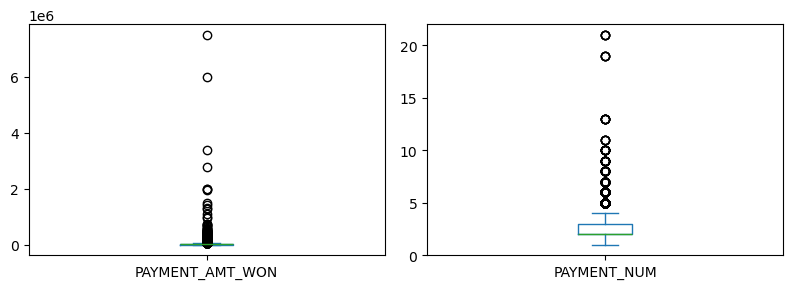

In [59]:
# 4. 데이터 시각화를 통한 탐색
# 이상치 탐색을 위한 시각화
# tn_activity_consume_his_df.plot(kind='box')
exclude = [
   'TRAVEL_ID','CONSUME_HIS_SEQ','CONSUME_HIS_SNO','VISIT_AREA_ID','BRNO','STORE_NM',
   'ROAD_NM_ADDR','LOTNO_ADDR','PAYMENT_DT','PAYMENT_ETC','ACTIVITY_TYPE_CD','ACTIVITY_TYPE_SEQ',
   'PAYMENT_MTHD_SE','ROAD_NM_CD','LOTNO_CD','SGG_CD'
]
num_cols = tn_activity_consume_his_df.select_dtypes(include='number').columns.difference(exclude)

n = len(num_cols)
ncols = 4
nrows = math.ceil(n / ncols)

axes = tn_activity_consume_his_df[num_cols].plot(
    kind='box', subplots=True, layout=(nrows, ncols),
    figsize=(ncols*4, nrows*3), sharex=False, sharey=False
)
plt.tight_layout()
plt.show()

##### 제외(박스플롯/수치형 이상치 대상 아님)

- 식별자/순번(ID류): TRAVEL_ID, CONSUME_HIS_SEQ, CONSUME_HIS_SNO, VISIT_AREA_ID, BRNO
    - 번호 크기에 의미가 없고, “큰 값=이상치”가 아님. 분포는 시스템 설계/입력 순서에 좌우됨.

- 카테고리 코드(숫자 라벨): ACTIVITY_TYPE_CD, ACTIVITY_TYPE_SEQ, PAYMENT_MTHD_SE
    - 숫자지만 “라벨”일 뿐 → 박스플롯의 사분위/거리 개념이 맞지 않음. 막대그래프/교차표로 보는 게 맞음.

- 주소 코드(지리 라벨): ROAD_NM_CD, LOTNO_CD, SGG_CD
    - 위치 식별키. 크기·거리 개념 없음. 외부 행정코드/좌표 매칭용일 때만 의미.

- 문자열/날짜: STORE_NM, ROAD_NM_ADDR, LOTNO_ADDR, PAYMENT_DT, PAYMENT_ETC
    - 숫자가 아니거나, 숫자로 강제 변환해도 이상치 개념이 부적절

##### 해당 이상치에 대해 논의 후 처리

In [60]:
# 5. 데이터 정제 및 전처리
tn_activity_consume_his_df_clean = tn_activity_consume_his_df.drop('SGG_CD', axis=1)
tn_activity_consume_his_df_clean = tn_activity_consume_his_df_clean.drop('ROAD_NM_CD', axis=1)
tn_activity_consume_his_df_clean = tn_activity_consume_his_df_clean.drop('LOTNO_CD', axis=1)
tn_activity_consume_his_df_clean = tn_activity_consume_his_df_clean.drop(columns=['BRNO'], errors='ignore')

##### 활동소비내역 분류
- 제거
    - SGG_CD : 결측치 과다(11000개 가량 데이터 중 결측치 10000개 이상), 더 적합한 장소 관련 칼럼 여럿 보유.
    - BRNO : 점포/사업자 식별에 사용되기에 주제 상 불필요.
    - ROAD_NM_CD, LOTNO_CD : 위치 식별키. 크기·거리 개념 없음. 외부 행정코드/좌표 매칭용일 때만 의미.

In [61]:
tn_activity_consume_his_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11739 entries, 0 to 11738
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TRAVEL_ID          11739 non-null  object
 1   VISIT_AREA_ID      11739 non-null  int64 
 2   ACTIVITY_TYPE_CD   11739 non-null  int64 
 3   ACTIVITY_TYPE_SEQ  11739 non-null  int64 
 4   CONSUME_HIS_SEQ    11739 non-null  int64 
 5   CONSUME_HIS_SNO    11739 non-null  int64 
 6   PAYMENT_NUM        11739 non-null  int64 
 7   STORE_NM           11690 non-null  object
 8   ROAD_NM_ADDR       11390 non-null  object
 9   LOTNO_ADDR         7870 non-null   object
 10  PAYMENT_DT         10361 non-null  object
 11  PAYMENT_MTHD_SE    11739 non-null  int64 
 12  PAYMENT_AMT_WON    11739 non-null  int64 
 13  PAYMENT_ETC        8369 non-null   object
dtypes: int64(8), object(6)
memory usage: 1.3+ MB
